In [1]:
import matplotlib.pyplot as plt
import numpy as np
import cv2
import os

In [33]:
def adjust_temperature(image):
    temperature_factor = np.random.uniform(1.1, 1.2)
    image[:, :, 0] = np.clip(image[:, :, 0] * temperature_factor, 0, 255)
    image[:, :, 2] = np.clip(image[:, :, 2] / temperature_factor, 0, 255)

    return image

In [40]:
def adjust_freshness(image):
    image = cv2.convertScaleAbs(image, alpha=1.2, beta=10)
    
    kernel_sharpening = np.array([[0, -1, 0],
                                  [-1, 5, -1],
                                  [0, -1, 0]])
    image = cv2.filter2D(image, -1, kernel_sharpening)
    
    image = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)
    image[:, :, 1] = np.clip(image[:, :, 1] * 1.2, 0, 255)
    image = cv2.cvtColor(image, cv2.COLOR_HSV2BGR)

    return image

In [35]:
def adjust_angle(image, mask):
    rotation_angle = np.random.randint(0, 360)
    rotation_matrix = cv2.getRotationMatrix2D((image.shape[1] // 2, image.shape[0] // 2), rotation_angle, 1.0)
    image_augmented = cv2.warpAffine(image, rotation_matrix, image.shape[1::-1], flags=cv2.INTER_LINEAR)
    mask_augmented = cv2.warpAffine(mask, rotation_matrix, mask.shape[1::-1], flags=cv2.INTER_NEAREST)

    flip = np.random.choice([0, 1])
    if flip == 1:
        image_augmented = cv2.flip(image_augmented, 1)
        mask_augmented = cv2.flip(mask_augmented, 1)

    return image_augmented, mask_augmented

In [38]:
def augmentData(image, mask, n_samples, index):
    for i in range(n_samples):
        image_adjusted = image.copy()

        if i >= 9:
            image_adjusted = adjust_temperature(image_adjusted)
        elif i >= 4:
            image_adjusted = adjust_freshness(image_adjusted)

        image_augmented, mask_augmented = adjust_angle(image_adjusted, mask)

        files_length = len([f for f in os.listdir(f'./Data/Images/1/I0{index}')])
        cv2.imwrite(f'./Data/Images/1/I0{index}/0{index}-{files_length + 1}.jpg', image_augmented)
        cv2.imwrite(f'./Data/Masks/1/L0{index}/L0{index}-{files_length + 1}.png', mask_augmented)

In [ ]:
for i in range(0, len([f for f in os.listdir(f'./Data/Images/4') if f != '.DS_Store'])):
    index = i + 1
    if len(str(index)) == 1:
            index = '0' + str(index)
    else:
          index = str(index)

    image = cv2.imread(f'./Data/Images/4/I0{index}/0{index}-1.jpg', cv2.IMREAD_COLOR)
    mask = cv2.imread(f'./Data/Masks/4/L0{index}/L0{index}-1.png', cv2.IMREAD_GRAYSCALE)
    augmentData(image, mask, 14, index)

In [41]:
index = '01'
image = cv2.imread(f'./Data/Images/1/I0{index}/0{index}-1.jpg', cv2.IMREAD_COLOR)
mask = cv2.imread(f'./Data/Masks/1/L0{index}/L0{index}-1.png', cv2.IMREAD_GRAYSCALE)
augmentData(image, mask, 14, index)

In [22]:
def calculateProportion(index):
    segment_areas = {}
    segment = [1, 2, 3]
    categories = ['Vegetable', 'Protein', 'Carbohydrate']

    if index == 1:
        mask = cv2.imread('../Data/Masks/L001/L001-1.png', 0)
    elif index > 1:
        mask = cv2.imread(f'../Data/Masks/L001/L001-{index}.png', 0)

    for label in np.unique(mask):
        area = np.sum(mask == label)
        segment_areas[label] = area

    
    segment_areas = {key: segment_areas[key] for key in segment}

    total_area = sum(segment_areas.values())

    for label, area in segment_areas.items():
        proportion = area / total_area
        print(f'{categories[label-1]} Proportion = {proportion:.4f}')

In [26]:
print('Original Image Propotion')
calculateProportion(1)

print('\nAugmented Image Propotion')
calculateProportion(2)

Original Image Propotion
Vegetable Proportion = 0.4514
Protein Proportion = 0.2313
Carbohydrate Proportion = 0.3173

Augmented Image Propotion
Vegetable Proportion = 0.4514
Protein Proportion = 0.2313
Carbohydrate Proportion = 0.3173


In [30]:
def showAugmentedImage(index):
    test_image = cv2.imread(f'../Data/Images/I002/002-{index}.jpg', 1)
    test_mask = cv2.imread(f'../Data/Masks/L002/L002-{index}.png', 0)

    plt.figure(figsize=(18, 12))

    plt.subplot(121)
    plt.imshow(cv2.cvtColor(test_image, cv2.COLOR_BGR2RGB))
    plt.title('Image')
    plt.axis('off')

    plt.subplot(122)
    plt.imshow(test_mask)
    plt.title('Mask')
    plt.axis('off')

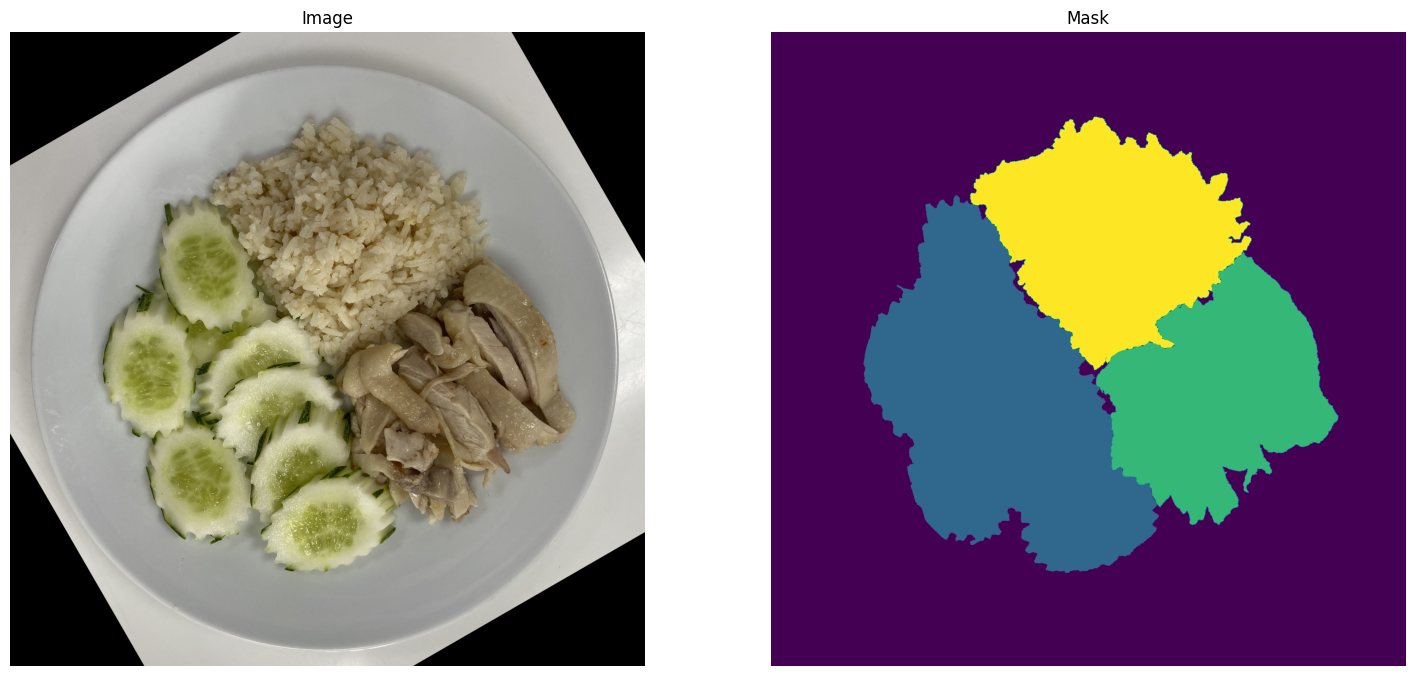

In [31]:
showAugmentedImage(2)